**Weather Analysis**

All statements are valid for the end of March 2018. During another time of a year significant changes may occur.
1. There is significantly more cities located in a Northern Hemisphere. Temperature vs Latitude plot shows a direct correlation between a distance from the equator with a temperature. The farther the city is located from the equator, the colder weather is there. Some outliers are possible on low latitudes - high mountains cities, where the temperatures are lower than the average for this latitude.
2. The correlation between Latitude and Humidity is not so obvious, but there is a trend that Humidity is 30% higher on the equator (from -20° S to 10° N). Also, the less humid regions can be found from 10° N to 50° N.
3. There is no dependence observed between Latitude and Cloudiness. There is a slight increase in wind speed as a distance from the equator increases. Also, it can be mentioned, that winds are insignificantly stronger in a Northern Hemisphere, probably because the inhabited territory is much larger.

In [1]:
import requests
import pandas as pd
import random
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns
from citipy import citipy
from pprint import pprint
from config import api_key
from itertools import cycle

**Create a list of random cities**

# this code kills the kernel, what I did wrong?
cities = {}

def onemoreloop():
    return citylistcreator()

def citylistcreator():
    for x in range(500):
        coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
        citydata = citipy.nearest_city(*coord)
        city = citydata.city_name
        if city not in cities:
            cities[city] = coord
        else:
            try:
                return onemoreloop()
            except(RecursionError):
                return onemoreloop()

citylistcreator()
print(len(cities))

**This works fine, but the output number of cities is unpredictable**

In [2]:
cities = {}

for x in range(3000):
    coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
    citydata = citipy.nearest_city(*coord)
    city = citydata.city_name
    #if city not in cities: Not necessary, because of using dictionary
        #cities[city] = coord
    #else:
        #pass
    cities[city] = coord # Coordinates are added to be able to look up based on them, for debugging

print(len(cities))

993


**Retrieve cities data from openweathermap using Requests**

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

all_requests_data = {}
counter = 1 # City number counter
absent_cities_req = 0 # Counter for the cities that are not in the openweather database

for city in cities:
    
    pure_city_name = city
    city = requests.utils.quote(city, safe='') # Make a city name readable (percent-encoded)
    ind_url = f'{url}appid={api_key}&units={units}&q={city}'
    # The line below is blocked, not to show the api_key
    #print(f'Now processing: city number {counter}, name {pure_city_name}\n{ind_url}')
    print(f'Now processing: city number {counter}, name {pure_city_name}')
    data_json = requests.get(ind_url).json()
    
    try:
        all_requests_data[data_json['name']] = [data_json['sys']['country'], data_json['coord']['lat'],
                                                data_json['coord']['lon'],
                                              data_json['main']['temp'], data_json['main']['humidity'],
                                              data_json['clouds']['all'], data_json['wind']['speed'], data_json['dt']]
    except(KeyError):
        print(f'There is no city {pure_city_name} in openweathermap database')
        absent_cities_req +=1
        continue
    counter += 1
    
print(f'{absent_cities_req} cities were skipped')
print(f'{len(all_requests_data)} cities data was captured')

Now processing: city number 1, name mar del plata
Now processing: city number 2, name cape town
Now processing: city number 3, name tsihombe
There is no city tsihombe in openweathermap database
Now processing: city number 3, name rikitea
Now processing: city number 4, name port elizabeth
Now processing: city number 5, name grand gaube
Now processing: city number 6, name soroti
Now processing: city number 7, name bredasdorp
Now processing: city number 8, name tuktoyaktuk
Now processing: city number 9, name rio grande
Now processing: city number 10, name jacareacanga
Now processing: city number 11, name puerto ayora
Now processing: city number 12, name bandarbeyla
Now processing: city number 13, name phan thiet
Now processing: city number 14, name jamestown
Now processing: city number 15, name port-gentil
Now processing: city number 16, name punta arenas
Now processing: city number 17, name toliary
There is no city toliary in openweathermap database
Now processing: city number 17, name p

Now processing: city number 145, name mosetse
Now processing: city number 146, name rocha
Now processing: city number 147, name georgetown
Now processing: city number 148, name lorengau
Now processing: city number 149, name pevek
Now processing: city number 150, name mwinilunga
Now processing: city number 151, name egvekinot
Now processing: city number 152, name vila franca do campo
Now processing: city number 153, name kizhinga
Now processing: city number 154, name komsomolskiy
Now processing: city number 155, name dargaville
Now processing: city number 156, name andreapol
Now processing: city number 157, name conde
Now processing: city number 158, name hauterive
Now processing: city number 159, name zhengjiatun
Now processing: city number 160, name kajaani
Now processing: city number 161, name bougouni
Now processing: city number 162, name khawhai
Now processing: city number 163, name yellowknife
Now processing: city number 164, name imeni poliny osipenko
Now processing: city number 

Now processing: city number 286, name guerrero negro
Now processing: city number 287, name bengkulu
There is no city bengkulu in openweathermap database
Now processing: city number 287, name ambilobe
Now processing: city number 288, name gat
Now processing: city number 289, name mrirt
There is no city mrirt in openweathermap database
Now processing: city number 289, name kiama
Now processing: city number 290, name moussoro
Now processing: city number 291, name mehamn
Now processing: city number 292, name gorontalo
Now processing: city number 293, name shimoda
Now processing: city number 294, name chuy
Now processing: city number 295, name puerto escondido
Now processing: city number 296, name tigzirt
Now processing: city number 297, name hasaki
Now processing: city number 298, name aripuana
Now processing: city number 299, name burnie
Now processing: city number 300, name acarau
There is no city acarau in openweathermap database
Now processing: city number 300, name talnakh
Now process

There is no city umzimvubu in openweathermap database
Now processing: city number 425, name opichen
Now processing: city number 426, name entre rios
Now processing: city number 427, name jegunovce
Now processing: city number 428, name matamoros
Now processing: city number 429, name asasa
Now processing: city number 430, name kainantu
Now processing: city number 431, name uaua
Now processing: city number 432, name kununurra
Now processing: city number 433, name port lincoln
Now processing: city number 434, name carahue
Now processing: city number 435, name khartoum
Now processing: city number 436, name sotouboua
Now processing: city number 437, name xining
Now processing: city number 438, name busayra
Now processing: city number 439, name champerico
Now processing: city number 440, name zolotinka
There is no city zolotinka in openweathermap database
Now processing: city number 440, name mandiana
Now processing: city number 441, name kudahuvadhoo
Now processing: city number 442, name kva

Now processing: city number 580, name masvingo
Now processing: city number 581, name tabiauea
There is no city tabiauea in openweathermap database
Now processing: city number 581, name kysyl-syr
Now processing: city number 582, name chara
Now processing: city number 583, name buala
Now processing: city number 584, name maniitsoq
Now processing: city number 585, name patacamaya
Now processing: city number 586, name portland
Now processing: city number 587, name stokmarknes
Now processing: city number 588, name oriximina
Now processing: city number 589, name etalle
Now processing: city number 590, name banda aceh
Now processing: city number 591, name lago da pedra
There is no city lago da pedra in openweathermap database
Now processing: city number 591, name mogadishu
Now processing: city number 592, name alenquer
Now processing: city number 593, name paita
Now processing: city number 594, name mizdah
Now processing: city number 595, name aasiaat
Now processing: city number 596, name aks

Now processing: city number 722, name la rioja
Now processing: city number 723, name arlit
Now processing: city number 724, name hervey bay
Now processing: city number 725, name kirakira
Now processing: city number 726, name lucapa
Now processing: city number 727, name xuddur
Now processing: city number 728, name codroipo
Now processing: city number 729, name imamoglu
Now processing: city number 730, name lithakia
Now processing: city number 731, name fleetwood
Now processing: city number 732, name nyurba
Now processing: city number 733, name nuevo progreso
Now processing: city number 734, name saint-francois
Now processing: city number 735, name pasighat
Now processing: city number 736, name santa lucia
Now processing: city number 737, name assiniboia
Now processing: city number 738, name owando
Now processing: city number 739, name san pedro de uraba
Now processing: city number 740, name jiangyou
Now processing: city number 741, name otjimbingwe
Now processing: city number 742, name 

Now processing: city number 877, name pojuca
Now processing: city number 878, name tres arroyos
Now processing: city number 879, name cochrane
Now processing: city number 880, name coos bay
Now processing: city number 881, name alice springs
Now processing: city number 882, name sibu
Now processing: city number 883, name olinda
Now processing: city number 884, name mormugao
There is no city mormugao in openweathermap database
Now processing: city number 884, name mpanda
Now processing: city number 885, name sosua
Now processing: city number 886, name micomeseng
Now processing: city number 887, name pyay
Now processing: city number 888, name macaboboni
There is no city macaboboni in openweathermap database
Now processing: city number 888, name novovasylivka
Now processing: city number 889, name telemaco borba
Now processing: city number 890, name the valley
Now processing: city number 891, name konibodom
Now processing: city number 892, name miyang
Now processing: city number 893, name 

**Create a DataFrame based on Requests data**

In [4]:
dframe_json = pd.DataFrame(all_requests_data)
final_req_df = dframe_json.transpose()
final_req_df.columns = ['Country', 'Latitude', 'Longitude', 'Temperature(F)', 'Humidity(%)', 'Cloudiness(%)', 'Wind Speed(MpH)',
                        'Date']
final_req_df.to_csv('Output/Weather_requests.csv')
print(final_req_df.count())
final_req_df.head()

Country            908
Latitude           908
Longitude          908
Temperature(F)     908
Humidity(%)        908
Cloudiness(%)      908
Wind Speed(MpH)    908
Date               908
dtype: int64


,Country,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
Aasiaat,GL,68.71,-52.87,17.73,83,12,2.59,1522710866
Abalak,NE,15.46,6.28,68.4,47,12,3.6,1522711437
Abatskoye,RU,56.29,70.46,16.56,83,8,10.54,1522711353
Abrau-Dyurso,RU,44.7,37.6,46.4,87,56,6.71,1522708200
Abu Zabad,SD,12.35,29.25,65.66,28,0,6.17,1522711374


**Retrieve cities data from openweathermap using openweathermapy**

**Here and below I use metric system because Farenheits sound like Sanskrit for me**

In [5]:
settings = {"units": "metric", "appid": api_key} 

In [6]:
import urllib

all_owm_data = []
absent_cities_owm = 0

for city in cities:
    try:
        all_owm_data.append(owm.get_current(city, **settings))
    except urllib.error.HTTPError:
        print(f'There is no city {city} in openweathermap database')
        absent_cities_owm += 1
        continue
        
print(f'{absent_cities_owm} cities were skipped')
print(f'{len(all_owm_data)} cities data was captured')

There is no city tsihombe in openweathermap database
There is no city toliary in openweathermap database
There is no city attawapiskat in openweathermap database
There is no city korla in openweathermap database
There is no city illoqqortoormiut in openweathermap database
There is no city belushya guba in openweathermap database
There is no city sentyabrskiy in openweathermap database
There is no city kapoeta in openweathermap database
There is no city mys shmidta in openweathermap database
There is no city barentsburg in openweathermap database
There is no city chagda in openweathermap database
There is no city taolanaro in openweathermap database
There is no city mudyuga in openweathermap database
There is no city ruatoria in openweathermap database
There is no city grand river south east in openweathermap database
There is no city vaitupu in openweathermap database
There is no city qunduz in openweathermap database
There is no city grimari in openweathermap database
There is no city

**Create a DataFrame based on OWM data**

In [7]:
search = ['name', 'sys.country', 'coord.lat', 'coord.lon', 'main.temp','main.humidity', 'clouds.all', 'wind.speed', 'dt']
extracted_data = [city(*search) for city in all_owm_data]

final_owm_df = pd.DataFrame(extracted_data)
final_owm_df.columns = ['Name','Country', 'Latitude', 'Longitude', 'Temperature(C)', 'Humidity(%)', 'Cloudiness(%)',
                        'Wind Speed(MpH)', 'Date']
final_owm_df.to_csv('Output/Weather_owm.csv')
print(final_owm_df.count())
final_owm_df.head()

Name               908
Country            908
Latitude           908
Longitude          908
Temperature(C)     908
Humidity(%)        908
Cloudiness(%)      908
Wind Speed(MpH)    908
Date               908
dtype: int64


,Name,Country,Latitude,Longitude,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
0,Mar del Plata,AR,-46.43,-67.52,21.80,48,48,11.01,1522711326
1,Cape Town,ZA,-33.93,18.42,20.00,68,0,7.20,1522706400
2,Rikitea,PF,-23.12,-134.97,25.75,100,32,2.21,1522711570
3,Port Elizabeth,US,39.31,-74.98,6.00,65,90,2.36,1522709760
4,Grand Gaube,MU,-20.01,57.66,26.00,88,75,2.10,1522710000


**Temperature vs Latitude Plot**

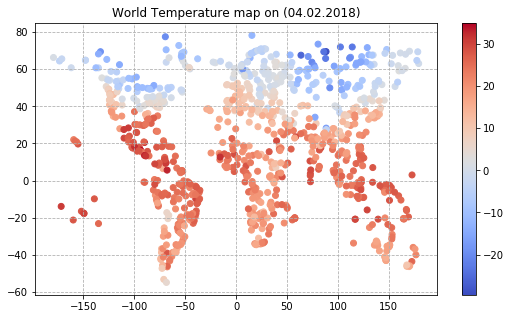

In [9]:
# Check  our data, if the cities are spread enough
current_date = datetime.datetime.now().date().strftime("%m.%d.%Y")
plt.figure(figsize=(9,5))
plt.scatter(final_owm_df['Longitude'], final_owm_df['Latitude'], c=final_owm_df['Temperature(C)'], cmap='coolwarm')
plt.colorbar()
plt.grid(linestyle='dashed')
plt.title(f'World Temperature map on ({current_date})')
plt.savefig(f'Output/World_temperature_map_({current_date}).png')

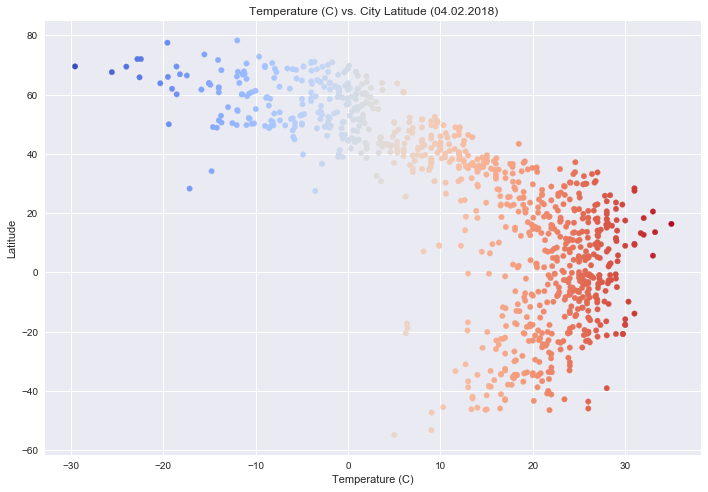

In [10]:
sns.set()
basedf = final_owm_df # DataFrame source for all plots can be easilly changed
plt.figure(figsize=(10,7))
plt.scatter(basedf['Temperature(C)'], basedf['Latitude'], c=basedf['Temperature(C)'], s=30, cmap='coolwarm')
plt.ylabel('Latitude')
plt.xlabel('Temperature (C)')
plt.title(f'Temperature (C) vs. City Latitude ({current_date})')
plt.tight_layout()
plt.savefig(f'Output/Temp_vs_City Latitude_({current_date}).png')

**Latitude vs Humidity, Cloudiness and Wind Speed Plots**

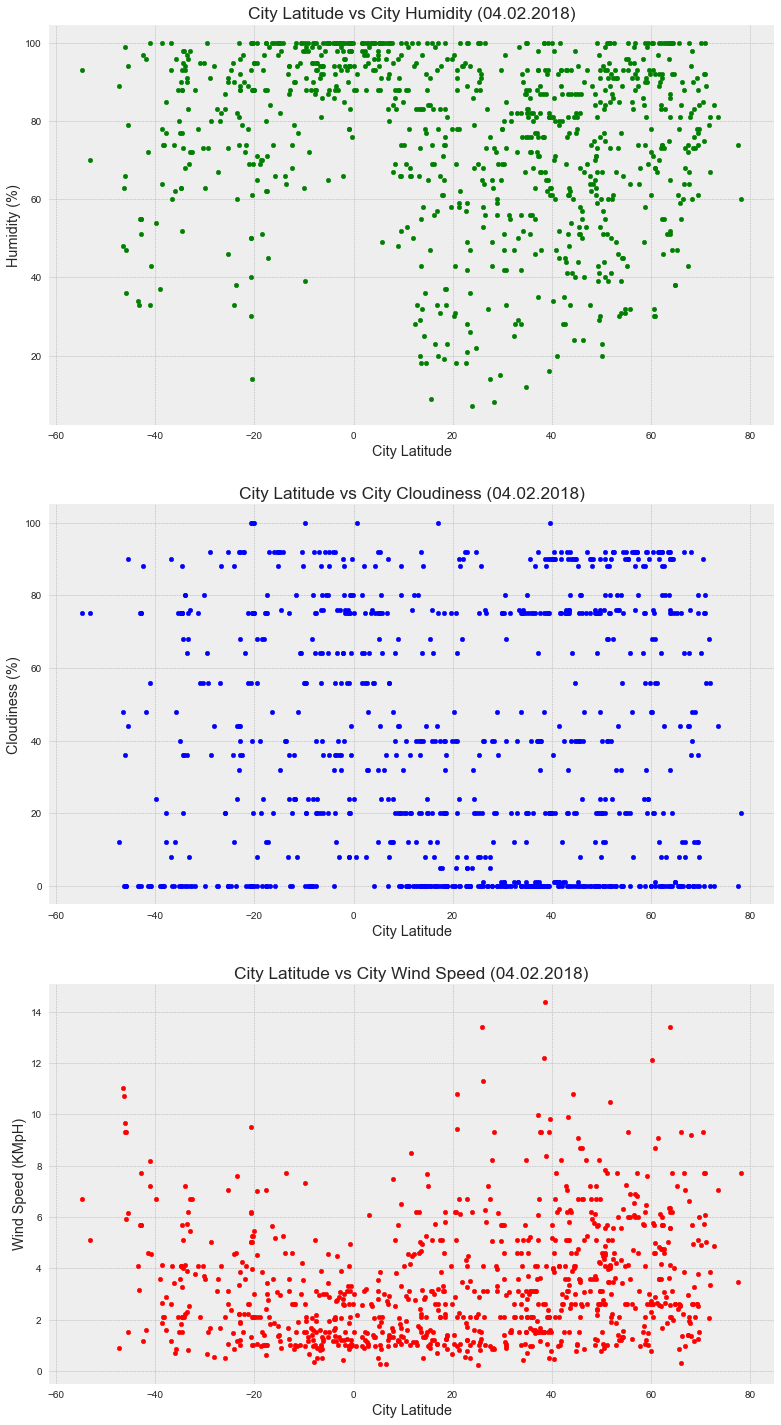

In [11]:
style.use('bmh')
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False)
#ax1.set_xlim(min(df_weather['Latitude'])-16, max(df_weather['Latitude'])+20)
fig.set_size_inches(13,25)

ax1.scatter(basedf['Latitude'], basedf['Humidity(%)'], c='g', s=20)
ax1.set_xlabel('City Latitude')
ax1.set_ylabel('Humidity (%)')
ax1.set_title(f'City Latitude vs City Humidity ({current_date})')

ax2.scatter(basedf['Latitude'], basedf['Cloudiness(%)'], c='b', s=20)
ax2.set_xlabel('City Latitude')
ax2.set_ylabel('Cloudiness (%)')
ax2.set_title(f'City Latitude vs City Cloudiness ({current_date})')

ax3.scatter(basedf['Latitude'], basedf['Wind Speed(MpH)'], c='r', s=20)
ax3.set_xlabel('City Latitude')
ax3.set_ylabel('Wind Speed (KMpH)')
ax3.set_title(f'City Latitude vs City Wind Speed ({current_date})')
plt.savefig(f'Output/Latitude_vs_Humid_Cloud_Wind_({current_date}).png')

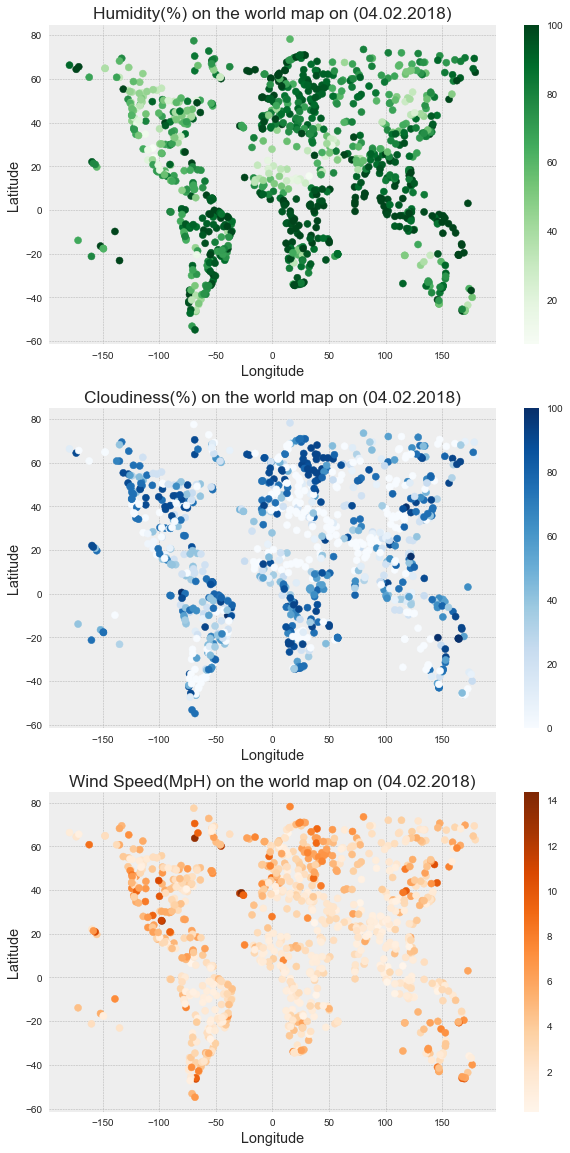

In [12]:
# Some more plots for fun
feature_list = ['Humidity(%)', 'Cloudiness(%)', 'Wind Speed(MpH)']
colors = cycle(['Greens', 'Blues', 'Oranges'])
plt.figure(figsize=(10,20))
for x in range(len(feature_list)):
    plt.subplot(3,1,x+1)
    plt.scatter(final_owm_df['Longitude'], final_owm_df['Latitude'], c=final_owm_df[feature_list[x]], cmap=next(colors))
    plt.title(f'{feature_list[x]} on the world map on ({current_date})')
    plt.colorbar()
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
plt.savefig(f'Output/World_maps_additions_({current_date}).png')